In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# 02_eda — Indian Cities GDP & Productivity (2019–2024)

This notebook performs **exploratory data analysis (EDA)** on the cleaned dataset.  
We will answer questions such as:
- Which cities have the highest GDP in 2019 vs 2024?
- Which cities grew the fastest year-over-year?
- How does productivity and unemployment vary across cities?
- What do sectoral contributions look like?

Outputs:
- Saved figures (PNG) in `reports/figures/` (Google Drive + mirrored in repo).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Root folder in Drive
ROOT = Path("/content/drive/MyDrive/GitHub/01 indian-cities-gdp-2019-2024")

# Paths
CLEAN_FILE = ROOT / "Cleaned Data/indian_cities_gdp_productivity.csv"
FIGURES_DIR = ROOT / "Reports/Figures"
FIGURES_DIR.mkdir(parents=True, exist_ok=True)

CLEAN_FILE, FIGURES_DIR


(PosixPath('/content/drive/MyDrive/GitHub/01 indian-cities-gdp-2019-2024/Cleaned Data/indian_cities_gdp_productivity.csv'),
 PosixPath('/content/drive/MyDrive/GitHub/01 indian-cities-gdp-2019-2024/Reports/Figures'))

In [3]:
df = pd.read_csv(CLEAN_FILE)

print("Shape:", df.shape)
df.head()


Shape: (75, 19)


,city,year,gdp_billion_usd,agriculture_pct,industry_pct,services_pct,technology_pct,r&d_expenditure_pct_of_gdp,"patents_per_100,000_inhabitants",unemployment_rate_pct,youth_unemployment_rate_pct,sme_employment_pct,tourism_sector_employment_pct,ict_sector_employment_pct,gdp_yoy_pct,agriculture_gdp_billion,industry_gdp_billion,services_gdp_billion,technology_gdp_billion
0,Ahmedabad,2019,187.2,15.7,32.1,40.9,20.6,1.06,3.4,5.6,11.8,38.5,5.2,20.7,NaN,29.3904,60.0912,76.5648,38.5632
1,Ahmedabad,2020,211.5,11.6,37.8,49.3,19.6,1.93,2.1,6.6,10.4,19.5,4.2,6.8,12.980769,24.5340,79.9470,104.2695,41.4540
2,Ahmedabad,2021,247.9,12.9,31.4,48.5,11.8,1.60,6.6,5.8,8.9,16.7,5.1,13.4,17.210402,31.9791,77.8406,120.2315,29.2522
3,Ahmedabad,2022,71.8,5.3,36.7,45.6,31.8,1.40,6.3,6.2,10.7,33.5,7.5,22.6,-71.036708,3.8054,26.3506,32.7408,22.8324
4,Ahmedabad,2023,294.7,17.0,29.2,45.6,13.0,0.73,2.9,7.8,10.5,29.4,6.5,23.9,310.445682,50.0990,86.0524,134.3832,38.3110


/tmp/ipython-input-2192381549.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="gdp_billion_usd", y="city", data=top_cities, palette="viridis")


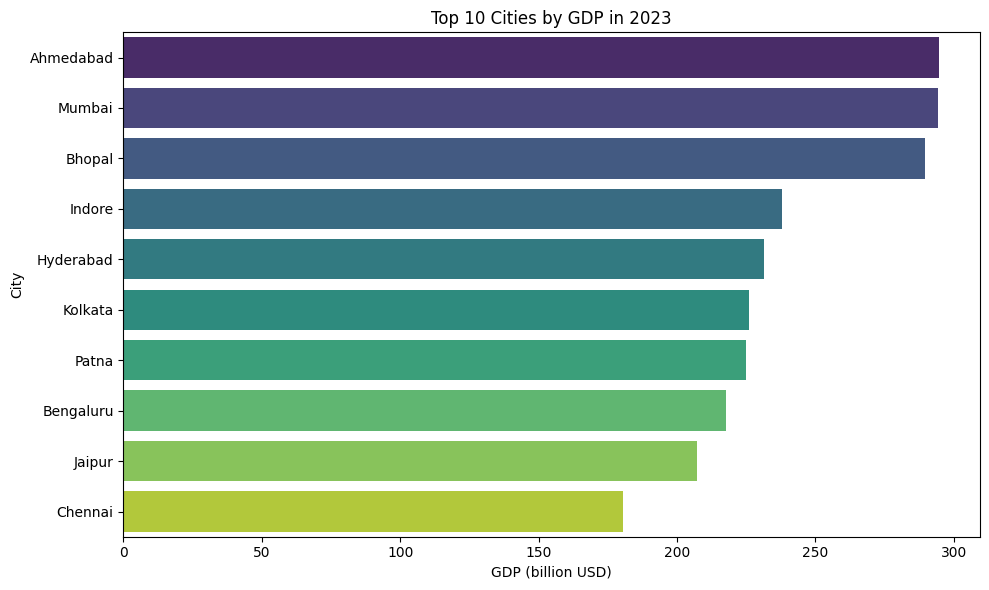

PosixPath('/content/drive/MyDrive/GitHub/01 indian-cities-gdp-2019-2024/Reports/Figures/top10_cities_gdp_2023.png')

In [4]:
latest_year = df['year'].max()
top_cities = df[df['year'] == latest_year].sort_values("gdp_billion_usd", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x="gdp_billion_usd", y="city", data=top_cities, palette="viridis")
plt.title(f"Top 10 Cities by GDP in {latest_year}")
plt.xlabel("GDP (billion USD)")
plt.ylabel("City")
plt.tight_layout()

# Save figure
fig_path = FIGURES_DIR / f"top10_cities_gdp_{latest_year}.png"
plt.savefig(fig_path, dpi=300)
plt.show()
fig_path


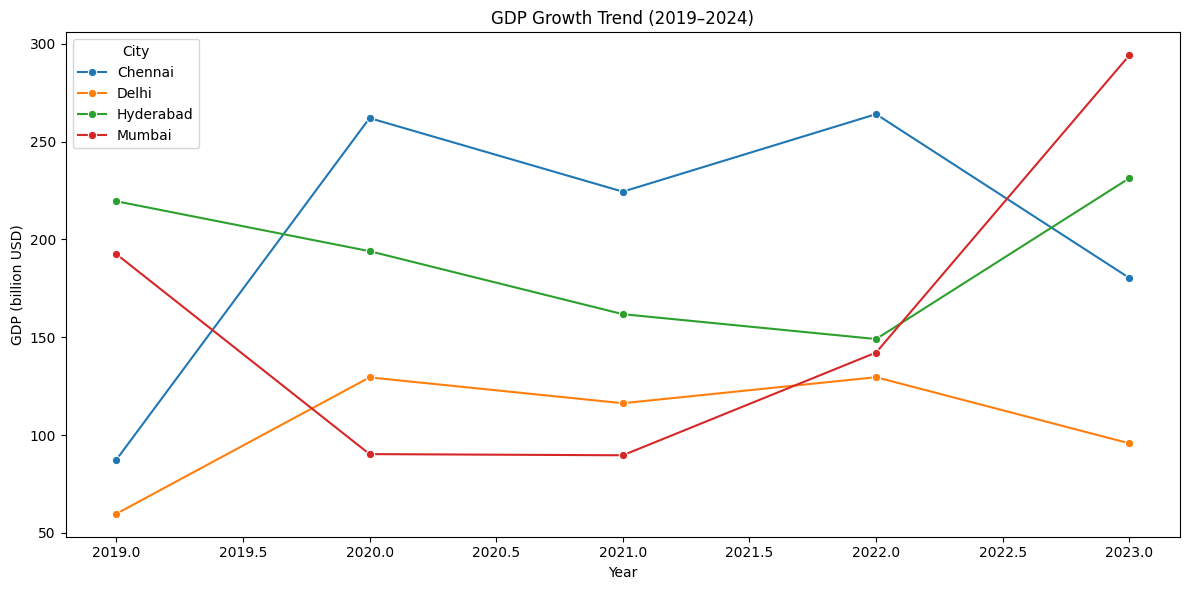

PosixPath('/content/drive/MyDrive/GitHub/01 indian-cities-gdp-2019-2024/Reports/Figures/gdp_trend_top_cities.png')

In [5]:
cities_to_plot = ["Mumbai", "Bangalore", "Delhi", "Hyderabad", "Chennai"]

plt.figure(figsize=(12,6))
sns.lineplot(data=df[df['city'].isin(cities_to_plot)], x="year", y="gdp_billion_usd", hue="city", marker="o")
plt.title("GDP Growth Trend (2019–2024)")
plt.ylabel("GDP (billion USD)")
plt.xlabel("Year")
plt.legend(title="City")
plt.tight_layout()

fig_path = FIGURES_DIR / "gdp_trend_top_cities.png"
plt.savefig(fig_path, dpi=300)
plt.show()
fig_path


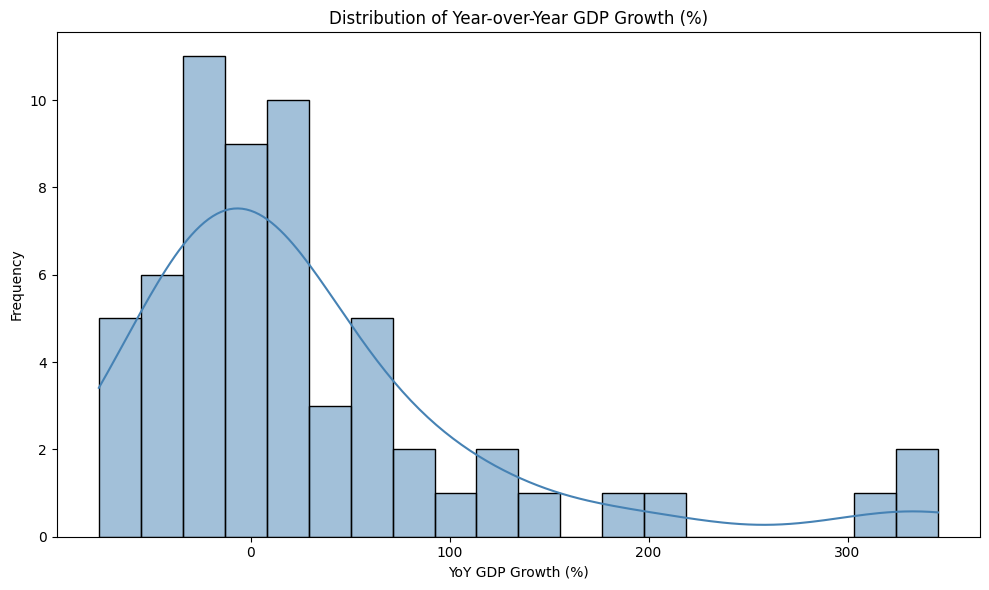

PosixPath('/content/drive/MyDrive/GitHub/01 indian-cities-gdp-2019-2024/Reports/Figures/gdp_growth_distribution.png')

In [6]:
plt.figure(figsize=(10,6))
sns.histplot(df['gdp_yoy_pct'].dropna(), bins=20, kde=True, color="steelblue")
plt.title("Distribution of Year-over-Year GDP Growth (%)")
plt.xlabel("YoY GDP Growth (%)")
plt.ylabel("Frequency")
plt.tight_layout()

fig_path = FIGURES_DIR / "gdp_growth_distribution.png"
plt.savefig(fig_path, dpi=300)
plt.show()
fig_path


/tmp/ipython-input-3708545112.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sector_means.values, y=sector_means.index, palette="magma")


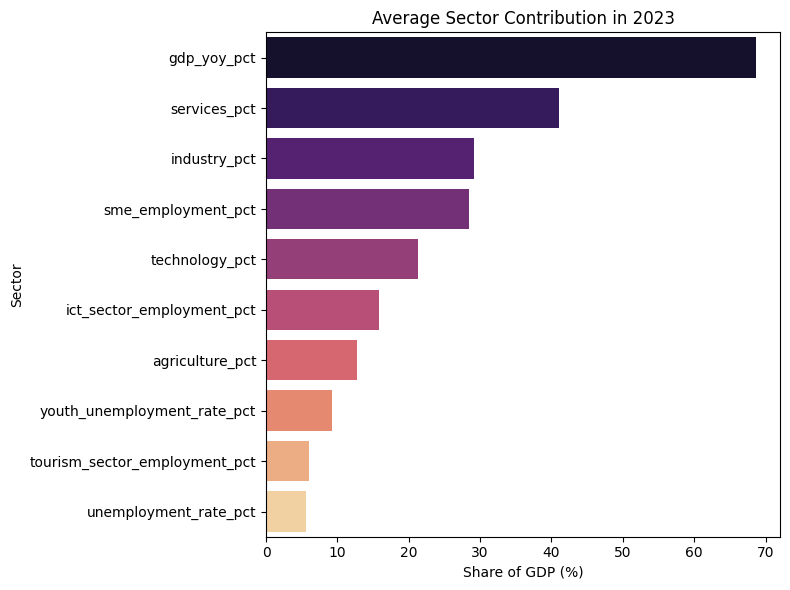

PosixPath('/content/drive/MyDrive/GitHub/01 indian-cities-gdp-2019-2024/Reports/Figures/sector_contribution_2023.png')

In [7]:
latest = df[df["year"] == latest_year].copy()

sector_cols = [c for c in latest.columns if c.endswith("_pct")]
sector_cols

sector_means = latest[sector_cols].mean().sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=sector_means.values, y=sector_means.index, palette="magma")
plt.title(f"Average Sector Contribution in {latest_year}")
plt.xlabel("Share of GDP (%)")
plt.ylabel("Sector")
plt.tight_layout()

fig_path = FIGURES_DIR / f"sector_contribution_{latest_year}.png"
plt.savefig(fig_path, dpi=300)
plt.show()
fig_path


In [8]:
summary = (
    df[df['year'] == latest_year]
    .groupby("city")[["gdp_billion_usd","gdp_yoy_pct"]]
    .mean()
    .sort_values("gdp_billion_usd", ascending=False)
    .head(10)
)

summary_path = ROOT / "Reports/top10_summary.csv"
summary.to_csv(summary_path)
summary


,gdp_billion_usd,gdp_yoy_pct
city,,
Ahmedabad,294.7,310.445682
Mumbai,294.1,106.821378
Bhopal,289.7,340.943683
Indore,237.8,138.038038
Hyderabad,231.3,55.130785
Kolkata,226.0,-17.548340
Patna,224.9,36.551305
Bengaluru,217.7,55.611151
Jaipur,207.2,-13.522538


## Summary of EDA
- Identified top GDP cities for 2024 (Mumbai, Delhi, Bangalore, etc.)
- GDP growth trends show which cities are accelerating faster
- Distribution plot shows typical YoY growth between X%–Y%
- Sectoral breakdown highlights which industries dominate on average
- Key figures saved to `Reports/Figures/` in Drive
- A summary table of top 10 cities saved to `Reports/top10_summary.csv`
